In [1]:

from DomAdpQSAR.QSARsettings import Settings
from DomAdpQSAR.QSARsrgan import DomAdpQSARSRGAN

settings = Settings()

import torch
import numpy as np
import pandas as pd
from DomAdpQSAR.utility import MixtureModel, gpu

from scipy.stats import norm

import phate
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
#Load in model
model_name = "SR GAN Ax LLx50 Feat size 32 Ang False Norm feat Norm True"

model_path = "logs/" + model_name + "/"

settings.load_model_path = model_path

SRGAN = DomAdpQSARSRGAN(settings)
SRGAN.dataset_setup()
SRGAN.model_setup()
SRGAN.prepare_optimizers()
SRGAN.load_models()

SRGAN.eval_mode()


dataset rank:  None
7
Model loaded from `logs/SR GAN Ax LLx50 Feat size 32 Ang False Norm feat Norm True/model_1400.pth`.


In [3]:
global_df = pd.read_parquet(model_name+"_global_df.parquet")

Calculating PHATE...
  Running PHATE on 63155 observations and 2048 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 99.10 seconds.
    Calculating affinities...


/home/alexi/miniconda3/envs/fluid_test_cpu/lib/python3.8/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 2262 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 0.89 seconds.
  Calculated graph and diffusion operator in 103.19 seconds.
  Calculating landmark operator...
    Calculating SVD...


/home/alexi/miniconda3/envs/fluid_test_cpu/lib/python3.8/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated SVD in 3.83 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.35 seconds.
  Calculated landmark operator in 9.10 seconds.
  Calculating optimal t...
    Automatically selected t = 52
  Calculated optimal t in 0.85 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.33 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.94 seconds.
Calculated PHATE in 116.42 seconds.


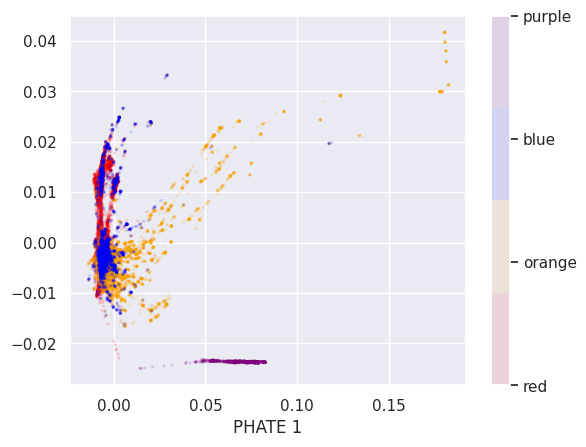

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


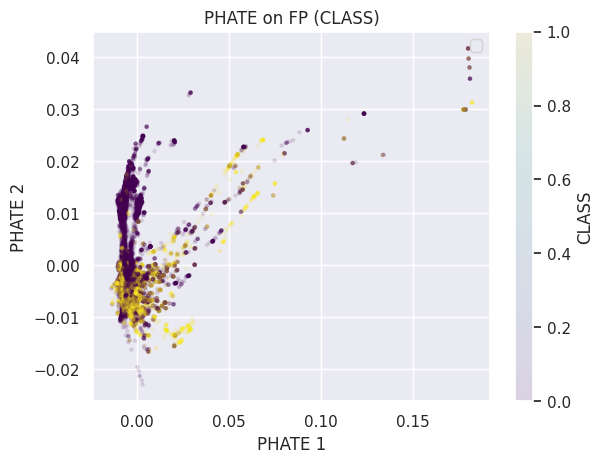

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


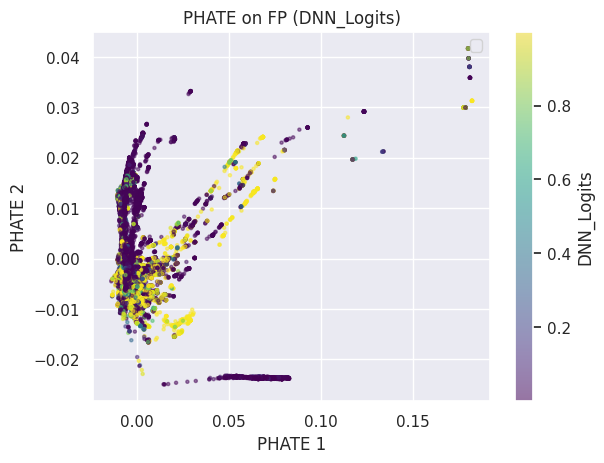

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


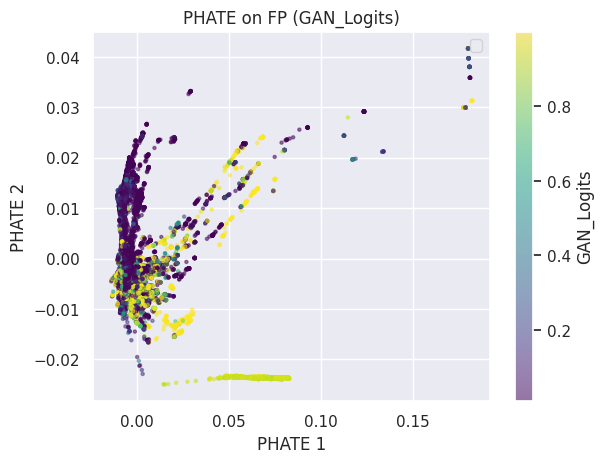

In [17]:
import matplotlib.pyplot as plt
import phate

# Perform PHATE on the GAN features
data = np.stack(global_df['FP'].to_numpy(), axis=0)
phate_operator = phate.PHATE(n_components=2, n_jobs=-1)
phate_embedding = phate_operator.fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=2, alpha=0.1)
ax.set_xlabel("PHATE 1")
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["CLASS"], cmap='viridis', s=5, alpha=0.1)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on FP (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["DNN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on FP (DNN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('DNN_Logits')

plt.show()


# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["GAN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on FP (GAN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

plt.show()




Calculating PHATE...
  Running PHATE on 63155 observations and 32 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 28.09 seconds.
    Calculating affinities...
    Calculated affinities in 0.17 seconds.


/home/alexi/miniconda3/envs/fluid_test_cpu/lib/python3.8/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 3014 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/home/alexi/miniconda3/envs/fluid_test_cpu/lib/python3.8/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated graph and diffusion operator in 28.30 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.71 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.48 seconds.
  Calculated landmark operator in 8.11 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.78 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.33 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.85 seconds.
Calculated PHATE in 40.38 seconds.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


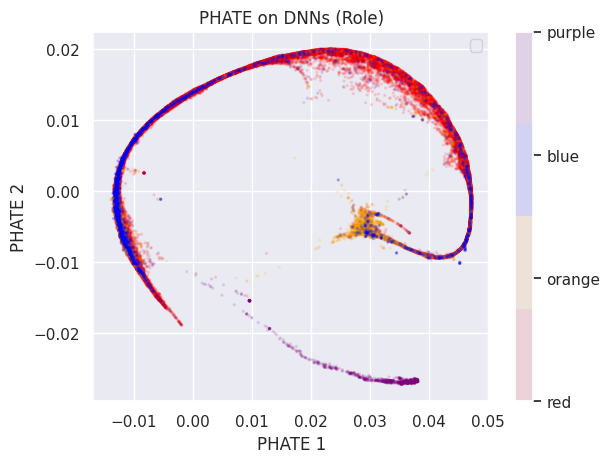

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


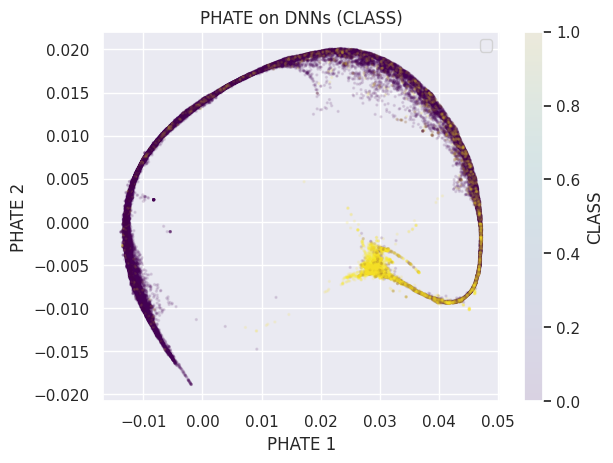

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


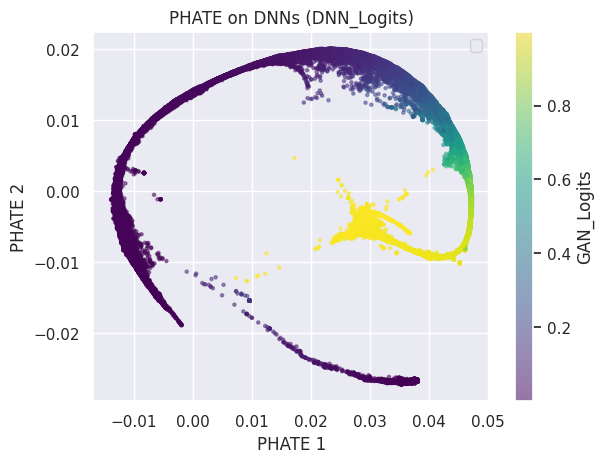

In [18]:
import matplotlib.pyplot as plt
import phate

# Perform PHATE on the GAN features
data = np.stack(global_df['DNN_Features'].to_numpy(), axis=0)
phate_operator = phate.PHATE(n_components=2, n_jobs=-1)
phate_embedding = phate_operator.fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=2, alpha=0.1)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on DNNs (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["CLASS"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on DNNs (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["DNN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on DNNs (DNN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

plt.show()



Calculating PHATE...
  Running PHATE on 63155 observations and 32 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 6.19 seconds.
    Calculating affinities...
    Calculated affinities in 0.14 seconds.
  Calculated graph and diffusion operator in 6.36 seconds.
  Calculating landmark operator...
    Calculating SVD...


/home/alexi/miniconda3/envs/fluid_test_cpu/lib/python3.8/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 2263 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/home/alexi/miniconda3/envs/fluid_test_cpu/lib/python3.8/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated SVD in 3.03 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.28 seconds.
  Calculated landmark operator in 6.20 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 0.77 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.28 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.76 seconds.
Calculated PHATE in 16.39 seconds.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


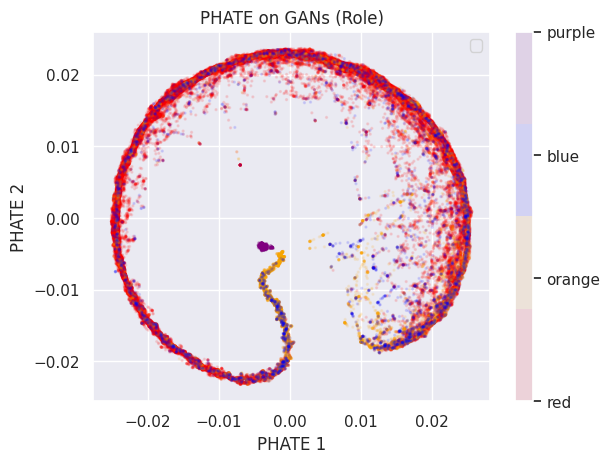

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


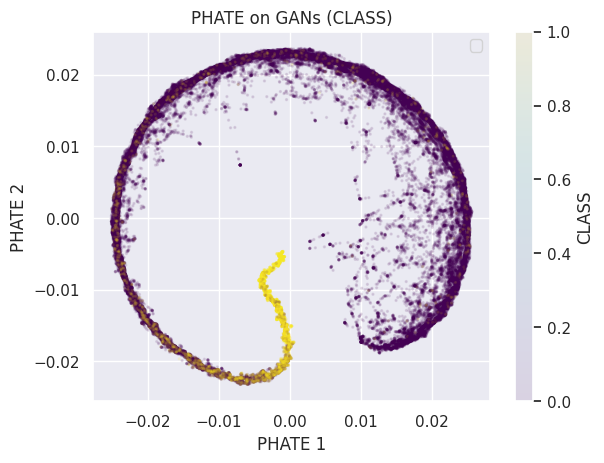

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


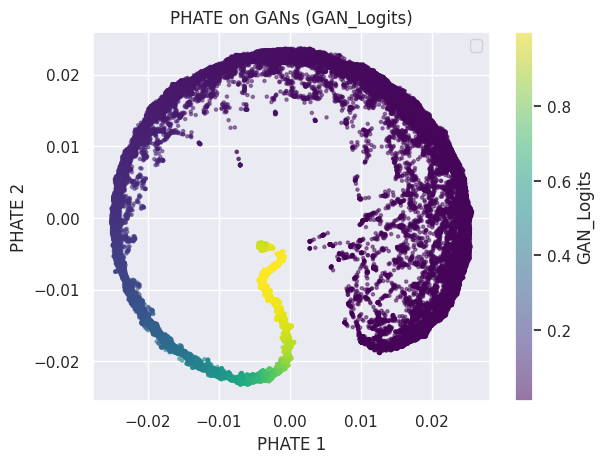

In [19]:
import matplotlib.pyplot as plt
import phate

# Perform PHATE on the GAN features
data = np.stack(global_df['GAN_Features'].to_numpy(), axis=0)
phate_operator = phate.PHATE(n_components=2, n_jobs=-1)
phate_embedding = phate_operator.fit_transform(data)

colors = ['red', 'orange', 'blue', 'purple']

# Plot based on "Role" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["Role"], cmap=matplotlib.colors.ListedColormap(colors), s=2, alpha=0.1)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on GANs (Role)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter, ticks=range(len(colors)))
cbar.set_ticklabels(colors)

plt.show()

# Plot based on "CLASS" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["CLASS"], cmap='viridis', s=2, alpha=0.1)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on GANs (CLASS)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('CLASS')

plt.show()

# Plot based on "GAN_Logits" column
fig, ax = plt.subplots()
scatter = ax.scatter(phate_embedding[:, 0], phate_embedding[:, 1], c=global_df["GAN_Logits"], cmap='viridis', s=5, alpha=0.5)
ax.set_xlabel("PHATE 1")
ax.set_ylabel("PHATE 2")
ax.set_title("PHATE on GANs (GAN_Logits)")
ax.legend()

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GAN_Logits')

plt.show()

